<a href="https://colab.research.google.com/github/Litzu10/python1/blob/master/Function_API_0609.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function API

In [0]:
%tensorflow_version 2.x

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input, concatenate, add

from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

Fashion Mnist 資料集

In [4]:
(x_train, y_train0), (x_test, y_test0) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

print('x_train.shape : ',x_train.shape)
print('x_test.shape : ',x_test.shape)

x_train.shape :  (60000, 784)
x_test.shape :  (10000, 784)


模型建構

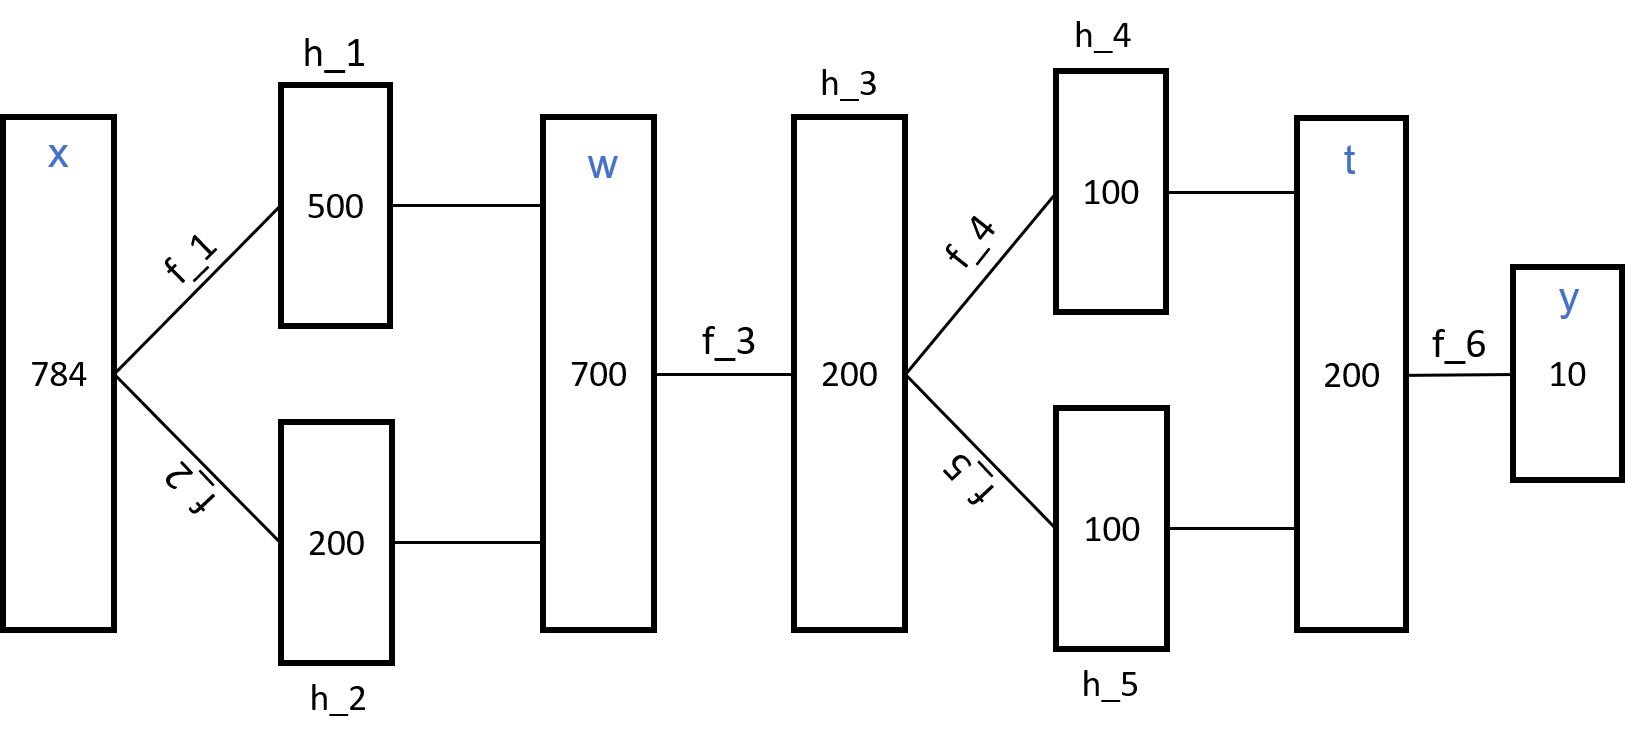

In [9]:
from IPython.display import Image
Image(filename="fn_API.png")

In [0]:
f_1 = Dense(500, activation='relu')
f_2 = Dense(200, activation='relu')
f_3 = Dense(200, activation='relu')
f_4 = Dense(100, activation='relu')
f_5 = Dense(100, activation='relu')
f_6 = Dense(10,activation='softmax')

In [0]:
h_1 = f_1(x)
h_2 = f_2(x)
w = concatenate([h_1, h_2])
h_3 = f_3(w)
h_4 = f_4(h_3)
h_5 = f_5(h_3)
t = concatenate([h_4, h_5])
y = f_6(t)

In [79]:
print(x)
print(w)
print(t)
print(y)

Tensor("input_11:0", shape=(None, 784), dtype=float32)
Tensor("concatenate_32/Identity:0", shape=(None, 700), dtype=float32)
Tensor("concatenate_33/Identity:0", shape=(None, 200), dtype=float32)
Tensor("dense_81_2/Identity:0", shape=(None, 10), dtype=float32)


In [71]:
model = Model(x,y)
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_76 (Dense)                (None, 500)          392500      input_11[0][0]                   
__________________________________________________________________________________________________
dense_77 (Dense)                (None, 200)          157000      input_11[0][0]                   
__________________________________________________________________________________________________
concatenate_32 (Concatenate)    (None, 700)          0           dense_76[2][0]                   
                                                                 dense_77[2][0]            

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

訓練模型

In [73]:
history = model.fit(x_train, y_train, batch_size=200, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
300/300 [==============================] - 6s 20ms/step - loss: 0.5002 - accuracy: 0.8225 - val_loss: 0.4532 - val_accuracy: 0.8402
Epoch 2/10
300/300 [==============================] - 6s 19ms/step - loss: 0.3572 - accuracy: 0.8698 - val_loss: 0.3593 - val_accuracy: 0.8693
Epoch 3/10
300/300 [==============================] - 6s 20ms/step - loss: 0.3130 - accuracy: 0.8845 - val_loss: 0.3735 - val_accuracy: 0.8652
Epoch 4/10
300/300 [==============================] - 6s 20ms/step - loss: 0.2939 - accuracy: 0.8914 - val_loss: 0.3609 - val_accuracy: 0.8670
Epoch 5/10
300/300 [==============================] - 6s 19ms/step - loss: 0.2790 - accuracy: 0.8946 - val_loss: 0.3399 - val_accuracy: 0.8722
Epoch 6/10
300/300 [==============================] - 6s 19ms/step - loss: 0.2614 - accuracy: 0.9024 - val_loss: 0.3460 - val_accuracy: 0.8750
Epoch 7/10
300/300 [==============================] - 6s 19ms/step - loss: 0.2486 - accuracy: 0.9062 - val_loss: 0.3240 - val_accuracy: 0.8833

準確率

In [77]:
score = model.evaluate(x_train, y_train, batch_size=10000)
score1 = model.evaluate(x_test, y_test, batch_size=10000)

print(f'x_train Accurancy: {score[1]*100}')
print(f'x_test Accurancy: {score1[1]*100}')

1/1 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8863
x_train Accurancy: 92.27166771888733
x_test Accurancy: 88.63000273704529


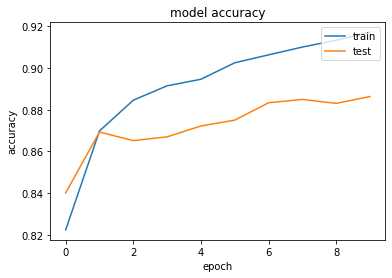

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

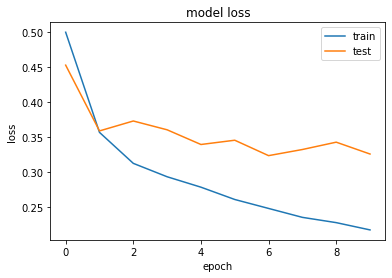

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()